## Question 1 - Bitcoin Testnet Transaction

In [4]:
#Import required libraries

from importlib import reload
from helper import run
import ecc
import helper
import script
import tx 

1. Create 4 Bitcoin Testnet addresses. Add below the addresses and the corresponding secrets, namely address1, address2, address3, address4.

In [9]:
from ecc import PrivateKey
from helper import hash256, little_endian_to_int

#Address 1
secret1 = little_endian_to_int(hash256(b'qwerty1'))
private_key1 = PrivateKey(secret1)
address1 = private_key1.point.address(testnet=True)
print("qwerty1 Address: "+ address1)
print("Secret 1: "+ str(secret1))

#Address 2
secret2 = little_endian_to_int(hash256(b'qwerty2'))
private_key2 = PrivateKey(secret2)
address2 = private_key2.point.address(testnet=True)
print("\qwerty2 Address: "+ address2)
print("Secret 2: "+ str(secret2))

#Address 3
secret3 = little_endian_to_int(hash256(b'qwerty3'))
private_key3 = PrivateKey(secret3)
address3 = private_key3.point.address(testnet=True)
print("\nqwerty3 Address: "+ address3)
print("Secret 3: "+ str(secret3))

#Address 4
secret4 = little_endian_to_int(hash256(b'qwerty4'))
private_key4 = PrivateKey(secret4)
address4 = private_key4.point.address(testnet=True)
print("\nqwerty4 Address: "+ address4)
print("Secret 4: "+ str(secret4))

Address 1: mhpcKMf5c8Y1ACHTLEmNKzzxkJXqME5WXf
Secret 2: 32096358358466310253816131080209211792447520358323468872018607224048626020377

Address 2: mjDPt86pt2S8gEn4TtEyD9fCFexaFT9Ri6
Secret 2: 2494339609819525247906704329777153465650117659745879258640524298638369097899

Address 3: n3NqV5KpWcEMUwi17CxXpHH6zb4YWPA6Sh
Secret 3: 104533069907879726791087557265415846272574193065210720528477029931153684609072

Address 4: mru9wdZVop4EwWzZSQCF69AiSSiRPyMHP4
Secret 4: 40509952545988927686870876049803613874045357454363086651978550990193568726178


2. From a BTC testnet faucet send testnet bitcoin to one of the addresses.

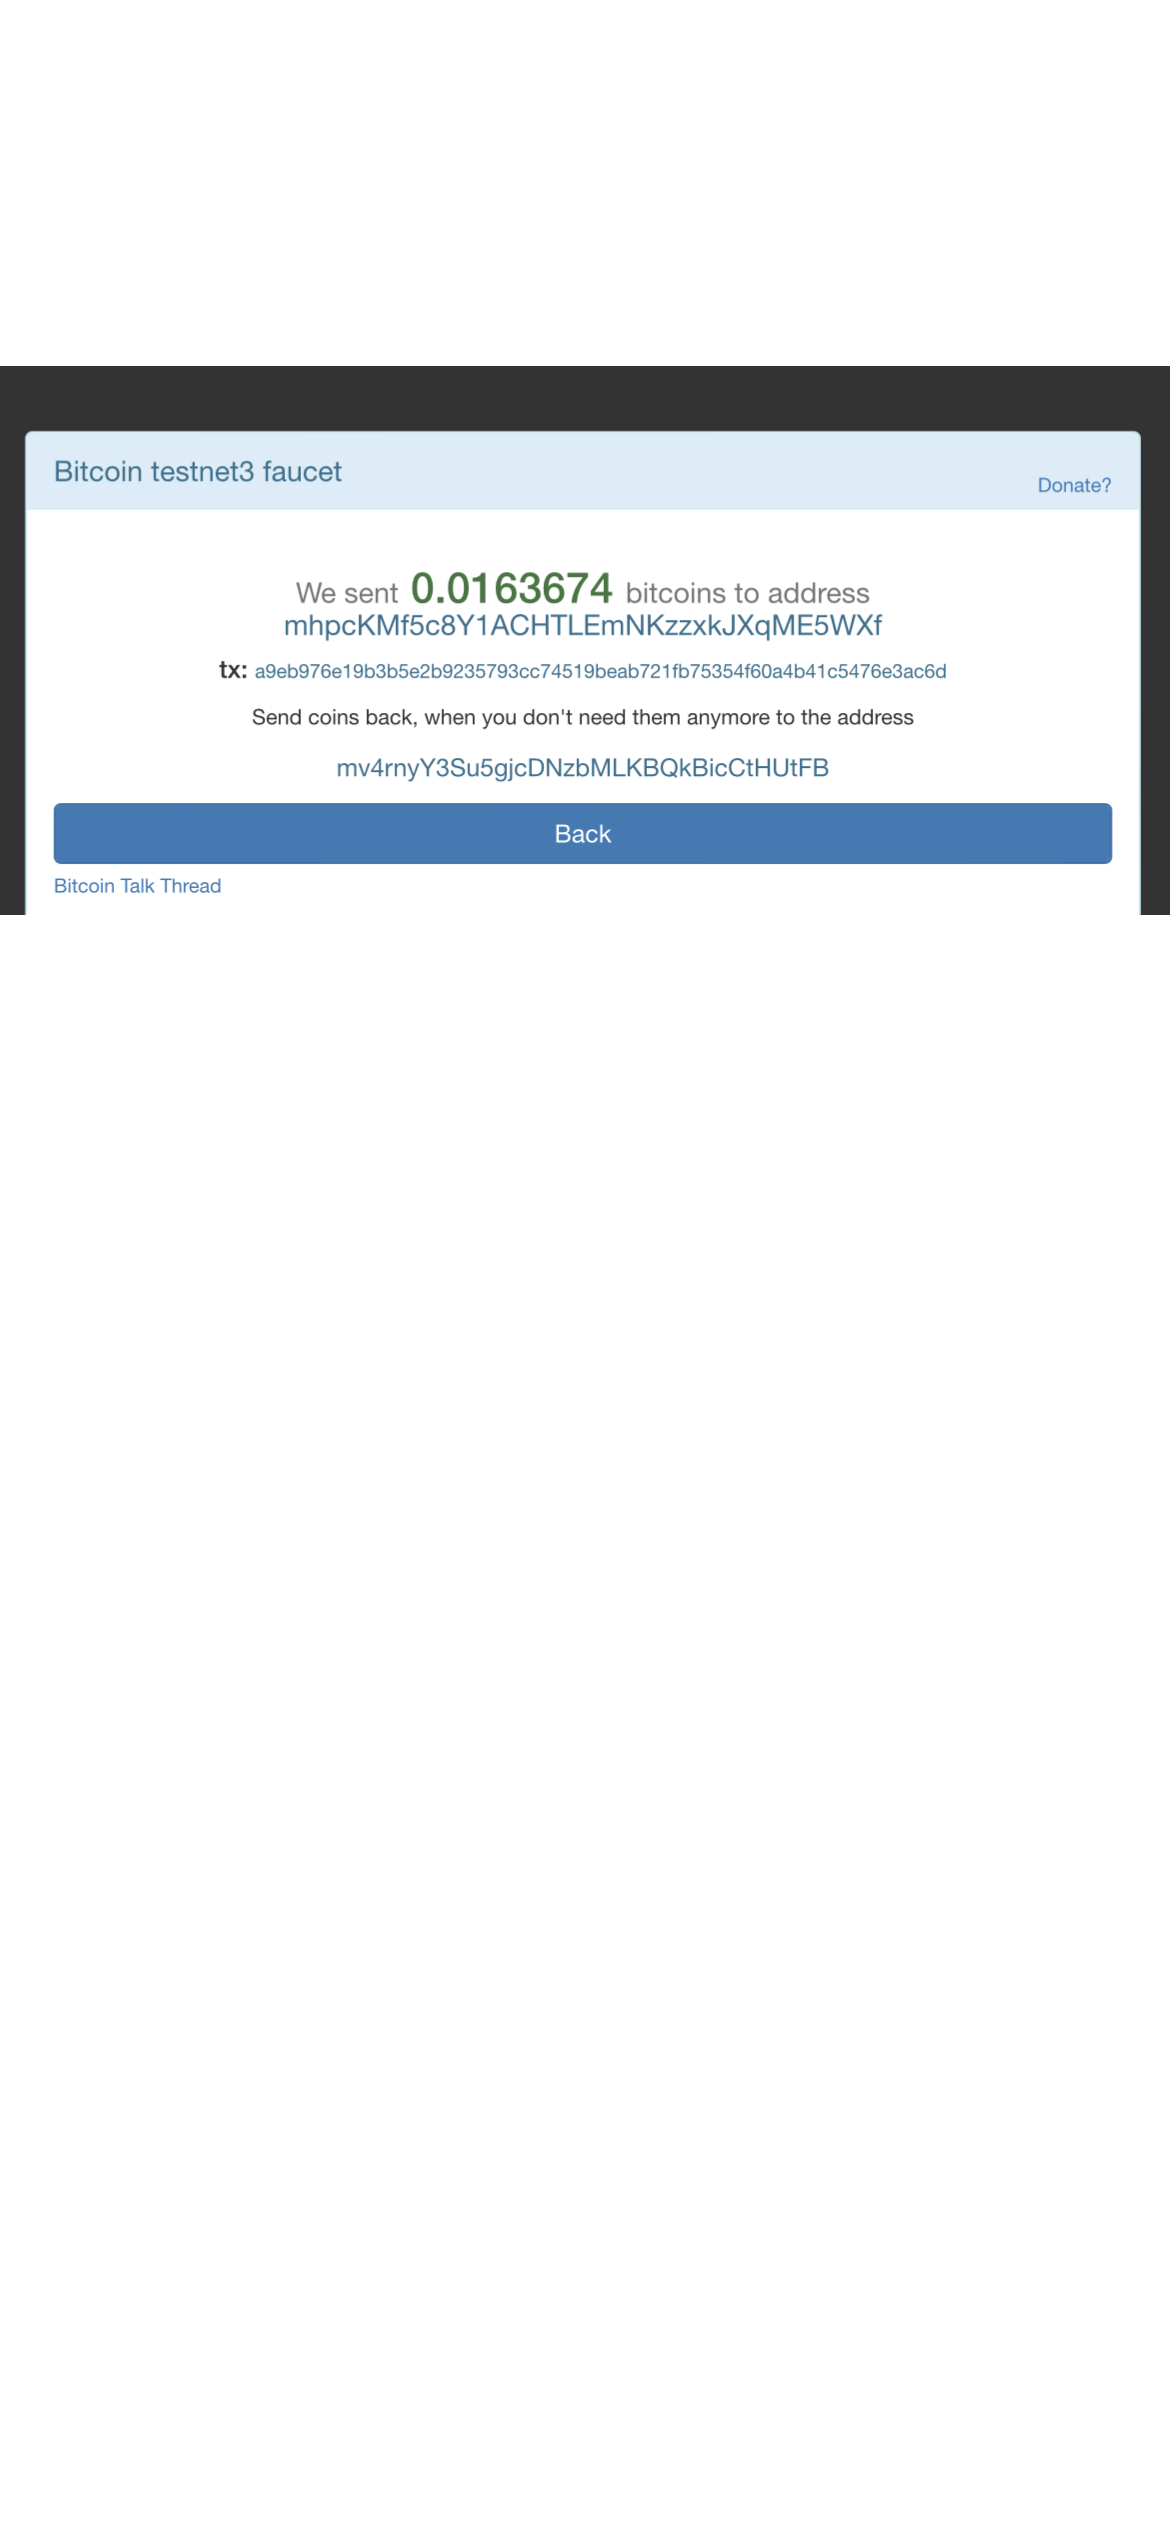

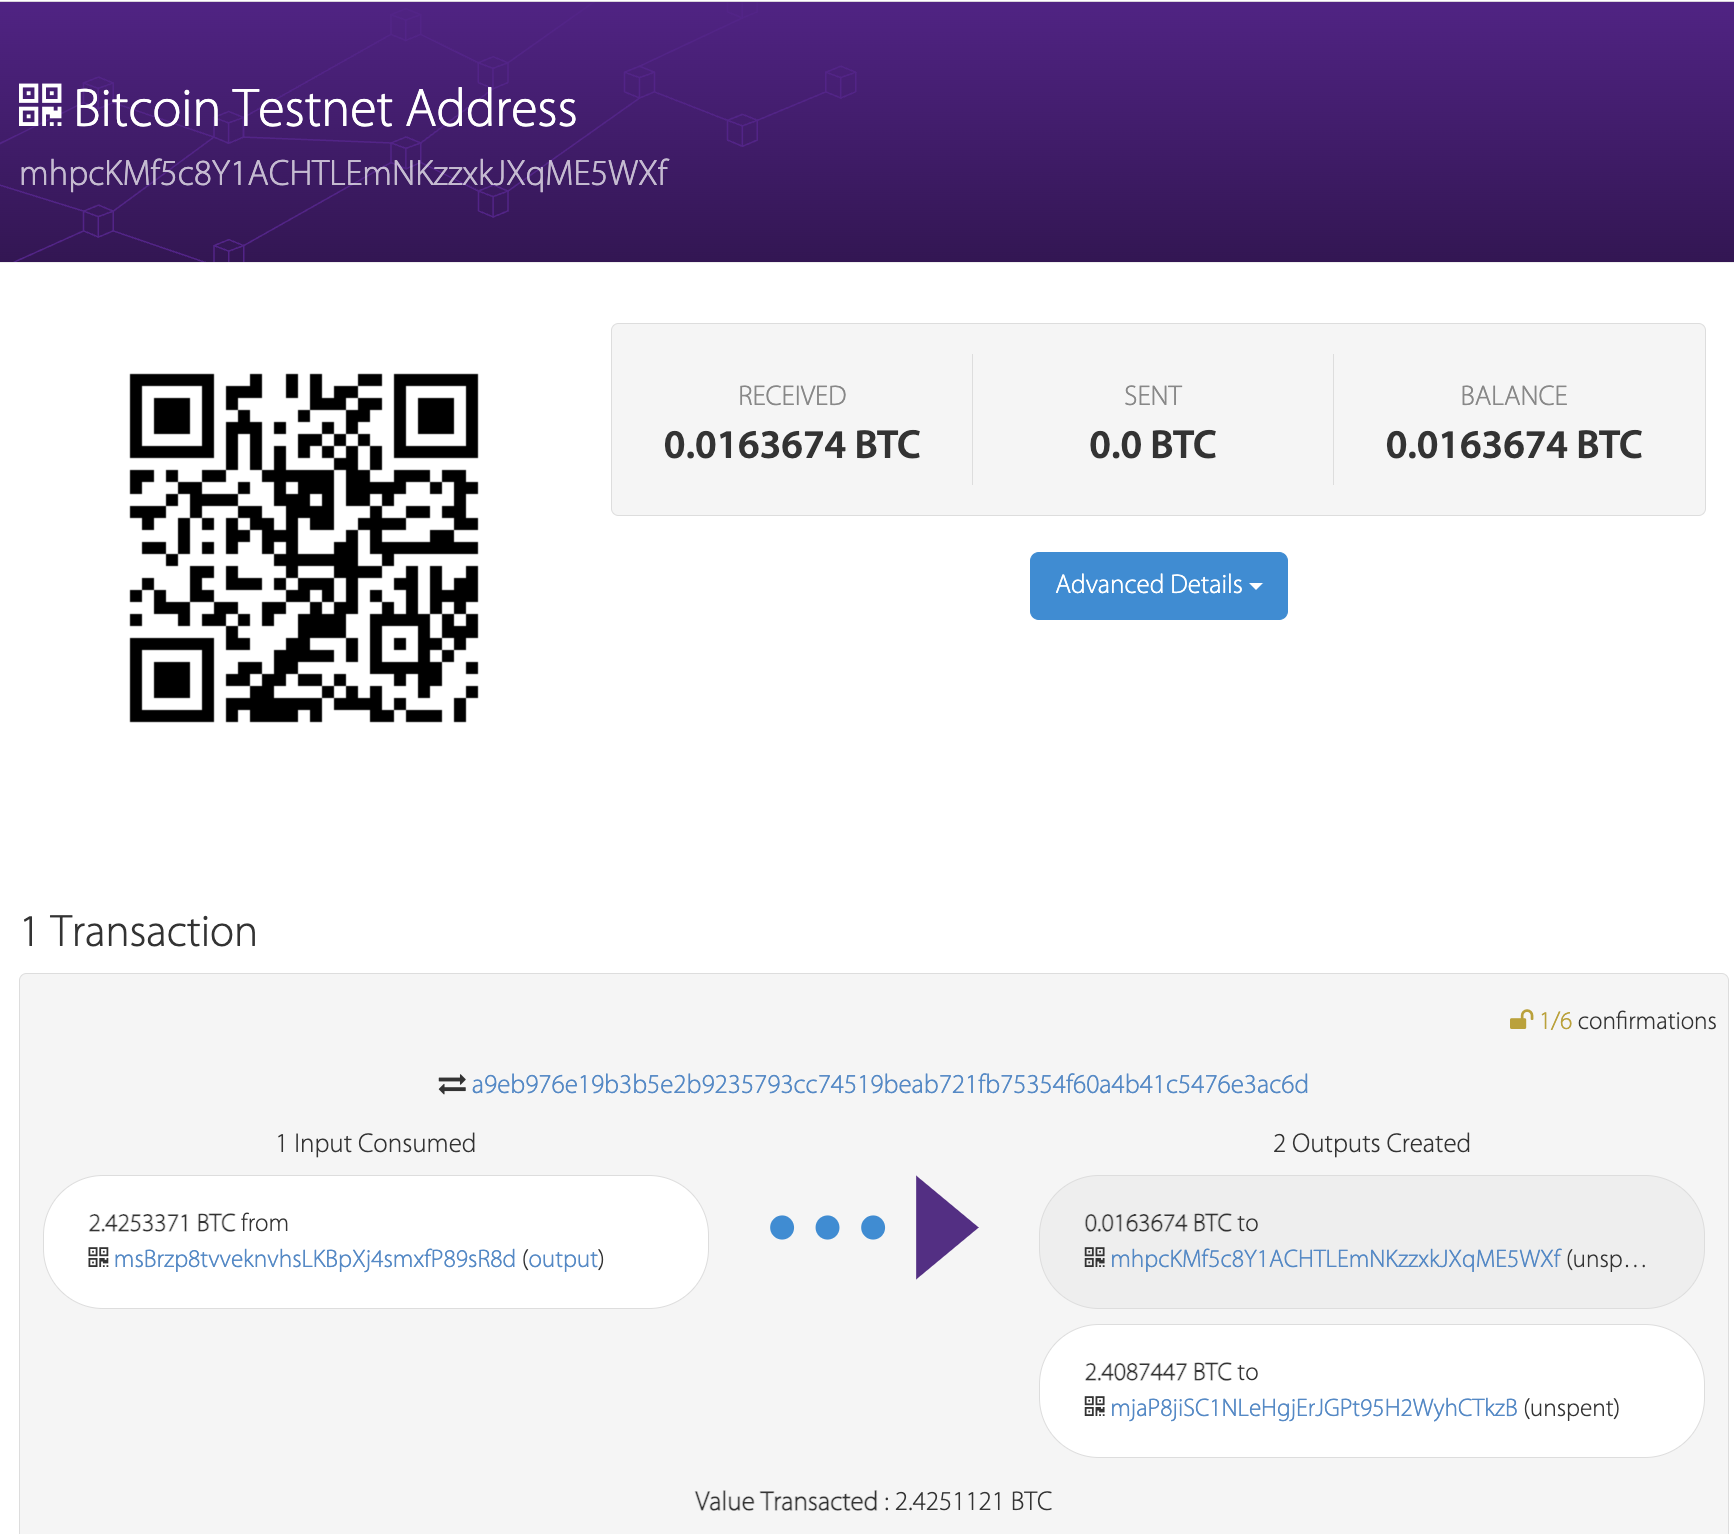

Bitcoin received: 0.0163674 BTC <br>
Transaction ID:  a9eb976e19b3b5e2b9235793cc74519beab721fb75354f60a4b41c5476e3ac6d

3. Create a 1-input 3-outputs transactions transferring 50%, 30%, 15% of the amount respectively into address2, address3, address4 respectively.

In [13]:
from helper import decode_base58, SIGHASH_ALL
from script import p2pkh_script, Script
from tx import TxIn, TxOut, Tx

# 1 input
# Define previous transaction when qwerty1 received 0.0163674 BTC (1636740 Satoshis) from BTC testnet3 faucet
prev_tx = bytes.fromhex('a9eb976e19b3b5e2b9235793cc74519beab721fb75354f60a4b41c5476e3ac6d')
prev_index = 0
tx_in1 = TxIn(prev_tx, prev_index)

# 3 outputs
tx_outs = []
# Transfer 0.0081837 BTC (50%) to qwerty2 - Output1
target_amount1 = int(818370)
target_h160_1 = decode_base58('mjDPt86pt2S8gEn4TtEyD9fCFexaFT9Ri6')
target_script1 = p2pkh_script(target_h160_1)
target_output1 = TxOut(amount=target_amount1, script_pubkey=target_script1)

# Transfer 0.00491022 BTC (30%) to qwerty3 - Output2
target_amount2 = int(491022)
target_h160_2 = decode_base58('n3NqV5KpWcEMUwi17CxXpHH6zb4YWPA6Sh')
target_script2 = p2pkh_script(target_h160_2)
target_output2 = TxOut(amount=target_amount2, script_pubkey=target_script2)

# Transfer 0.00245511 BTC (15%) to qwerty4 - Output3
target_amount3 = int(245511)
target_h160_3 = decode_base58('mru9wdZVop4EwWzZSQCF69AiSSiRPyMHP4')
target_script3 = p2pkh_script(target_h160_3)
target_output3 = TxOut(amount=target_amount3, script_pubkey=target_script3)

# Define the transaction
tx_obj = Tx(1, [tx_in1], [target_output1, target_output2, target_output3], 0, True)
print(tx_obj)

tx: 58d996d5391bb26febd1ea805f4e160d0379b62bb87aed7630510541339eec5c
version: 1
tx_ins:
a9eb976e19b3b5e2b9235793cc74519beab721fb75354f60a4b41c5476e3ac6d:0
tx_outs:
818370:OP_DUP OP_HASH160 288e60072517588748cc187f5514ddc9af96023b OP_EQUALVERIFY OP_CHECKSIG
491022:OP_DUP OP_HASH160 efc9c13eefad7b44818cf5dbc78dafde7ca39dfe OP_EQUALVERIFY OP_CHECKSIG
245511:OP_DUP OP_HASH160 7cdc42088d7e55e84c262b73430ae1d540c7009e OP_EQUALVERIFY OP_CHECKSIG
locktime: 0


4. Sign the transaction and submit it into the Bitcoin testnet via https://live.blockcypher.com/btc-testnet/pushtx/

In [14]:
#Sign the transaction
from ecc import PrivateKey
from helper import SIGHASH_ALL
z = tx_obj.sig_hash(0)

# use qwerty1's secret
private_key = PrivateKey(secret=32096358358466310253816131080209211792447520358323468872018607224048626020377)
der = private_key.sign(z).der()
sig = der + SIGHASH_ALL.to_bytes(1, 'big')
sec = private_key.point.sec()
script_sig = Script([sig, sec])
tx_obj.tx_ins[0].script_sig = script_sig
print(tx_obj.serialize().hex())

01000000016dace376541cb4a4604f3575fb21b7ea9b5174cc935723b9e2b5b3196e97eba9000000006a47304402204c84af3c4a8494d1ea0cfa709e597904cca453090df85ec3e8fc05edfc521e69022066687ea58d78f83158416f10802478eb90990372a1cfa5e571e4adc177371e88012102311697f6be5b47230288155e83166105dcd9c98e92dd900c31ce0c193743a37dffffffff03c27c0c00000000001976a914288e60072517588748cc187f5514ddc9af96023b88ac0e7e0700000000001976a914efc9c13eefad7b44818cf5dbc78dafde7ca39dfe88ac07bf0300000000001976a9147cdc42088d7e55e84c262b73430ae1d540c7009e88ac00000000


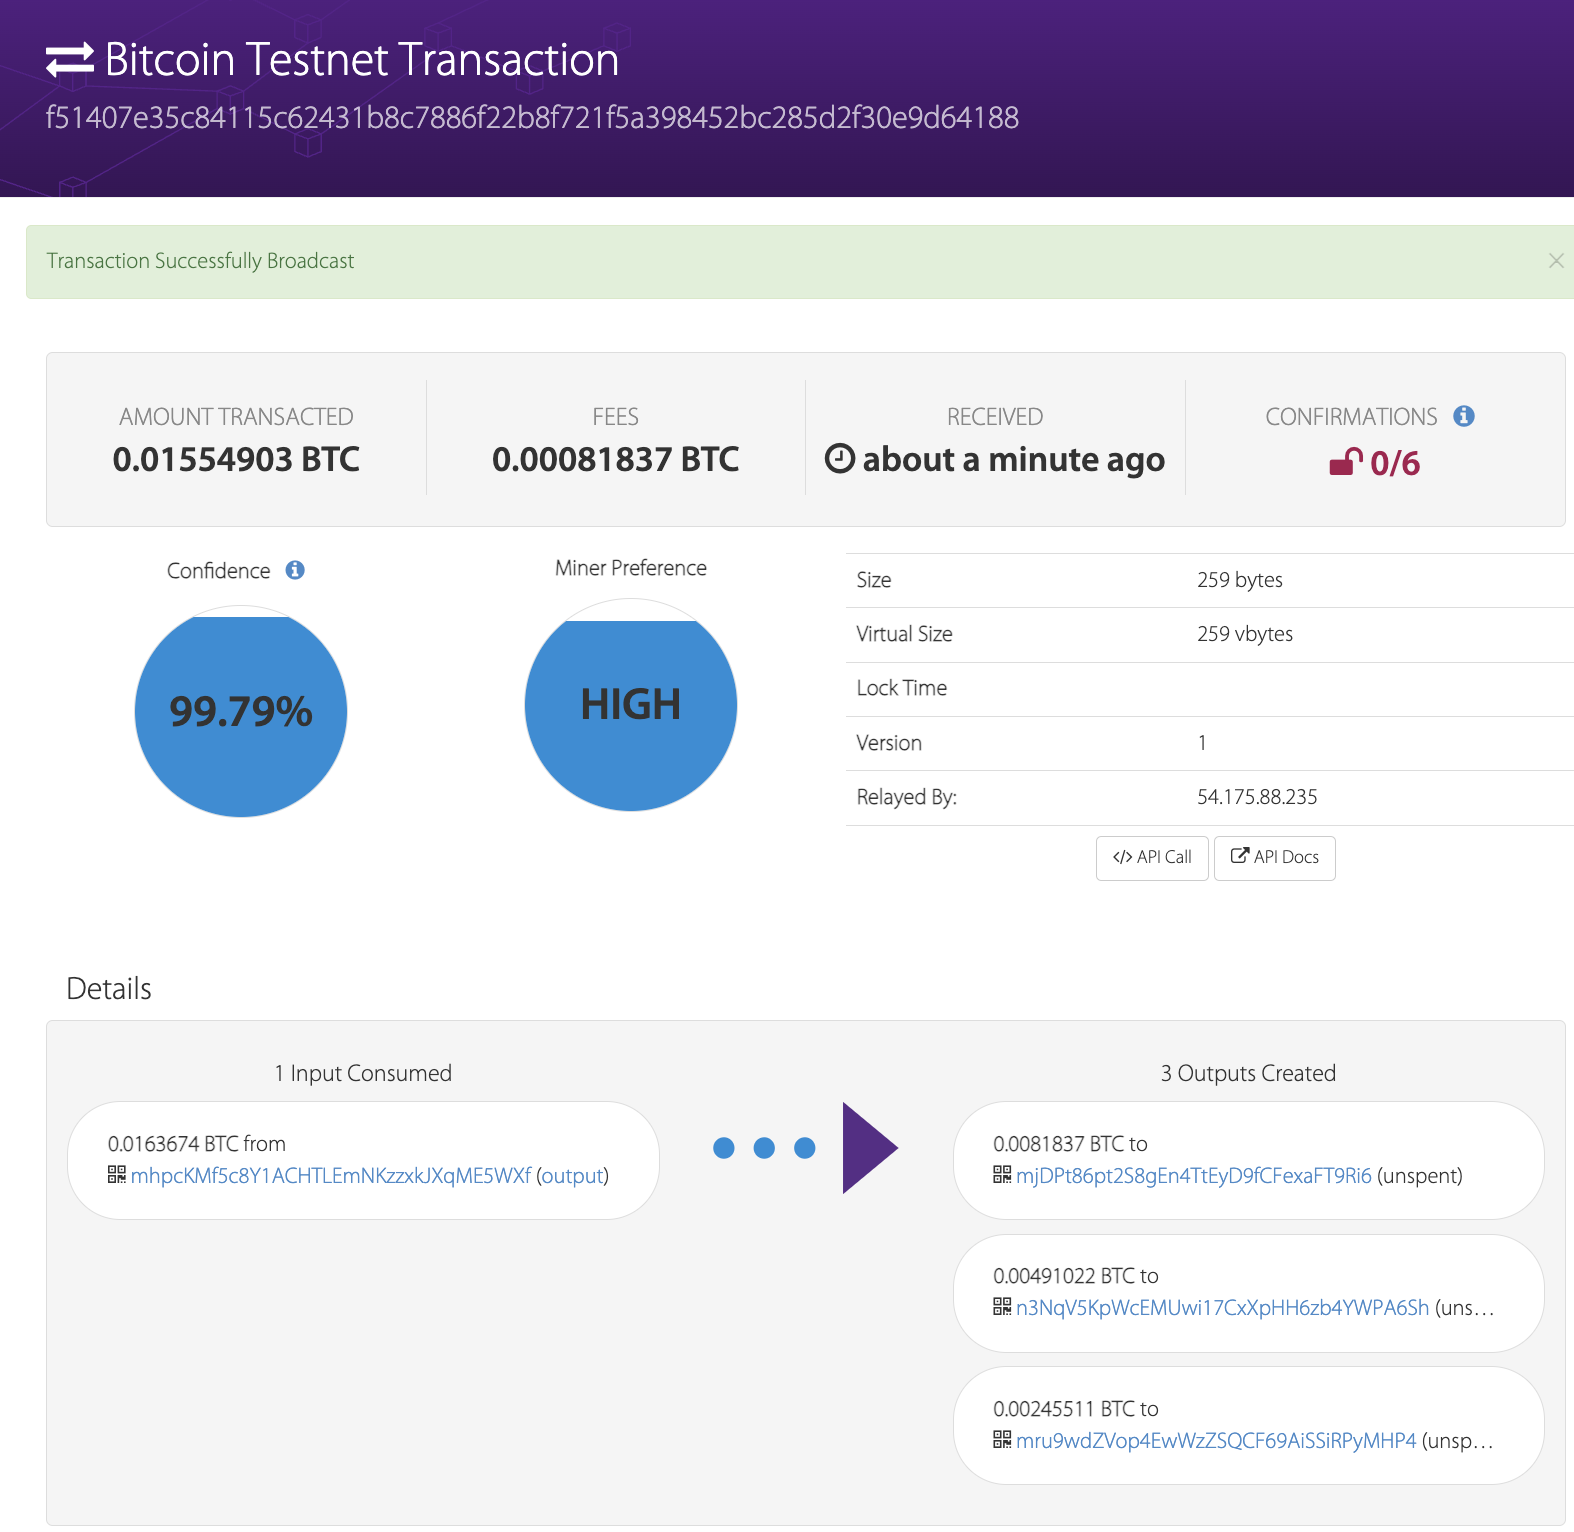

URL: https://live.blockcypher.com/btc-testnet/tx/f51407e35c84115c62431b8c7886f22b8f721f5a398452bc285d2f30e9d64188/


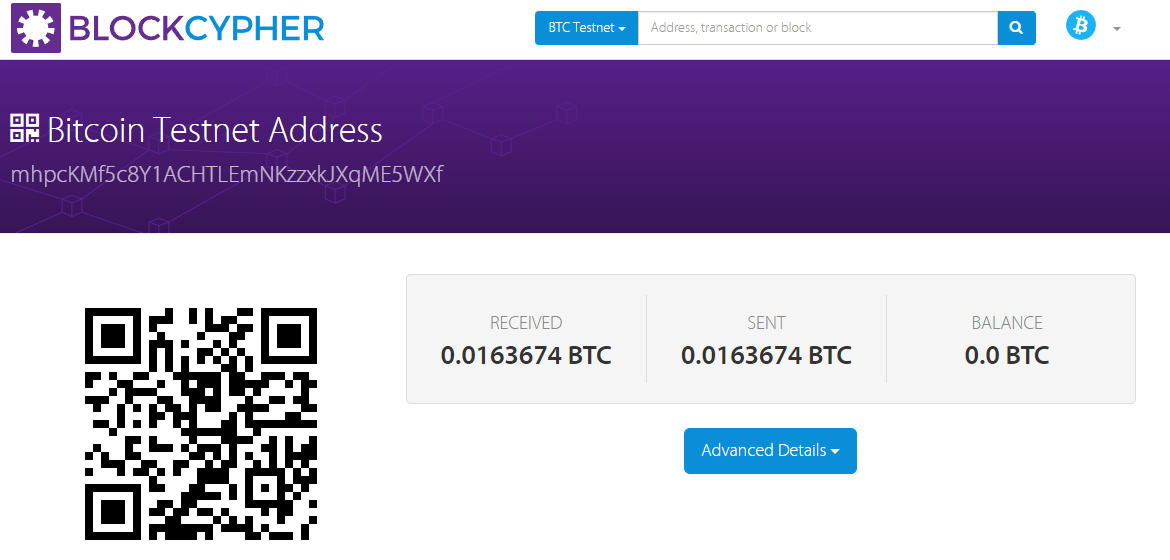
<br> Balance of Address 1

URL: https://live.blockcypher.com/btc-testnet/address/mhpcKMf5c8Y1ACHTLEmNKzzxkJXqME5WXf/

5. How much fees are transferred to the miner and how are they calculated?

The transaction fee is calculated from difference between the total inputs and total outputs. In this scenario there is 1 input and 3 outputs.

Input 1: 0.0163674 BTC
Output 1: 0.0081837 BTC
Output 2: 0.00491022 BTC
Output 3: 0.00245511 BTC

Transaction fee = 0.0163674 - (0.0081837 + 0.00491022 + 0.00245511)
                = 0.00081837 BTC

## Question 2 - Smart contract for cash in DAML

### Contract template

1. Start by creating a new project and .daml file.

Using the following command in terminal

daml new Cash

2. Create a contract template called Cash with parameters

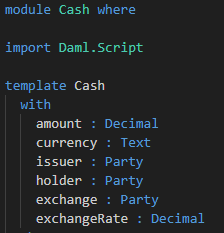

3. Then, define the roles of the parties. What type of party should the issuer be? And the exchange?
4. Add a condition to ensure the amount of cash is larger than zero

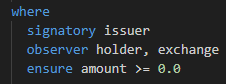

5. Add a function Transfer which transfer the cash to new holder, where the controller is the holder
6. Add a function UpdateExchangeRate which sets a new Exchange rate, where the controller is the holder

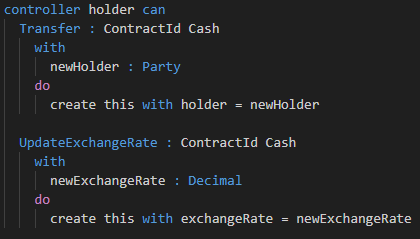

7. Add a function Swap which converts the currency (currency = newCurrency), updates the amount with the specified exchange rate (amount = amount/exchangeRate), and asserts the exchange rate is larger than 1.0 (exchangeRate > 1.0)

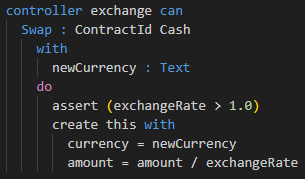

### Scenario testing

1. Create three parties: “Party_1” (the issuer), “Party_2” (the holder), “Party_3” (the exchange)

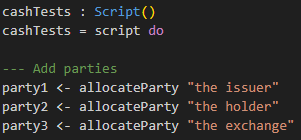

2. Let the issuer “Party 1” issue a new contract where the issuer “Party 1” wishes to transfer 100 USD to “Party 2”. At this stage set the issuer = the holder (2 points), and the exchangeRate = 0.0

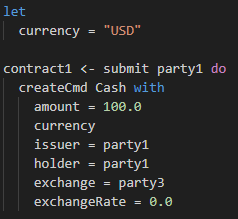

3. Let the holder (=issuer) transfer the cash to “Party 2”

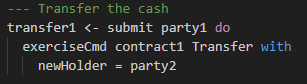

4. Let the new holder “Party 2” update the contract with exchangeRate = 1.2

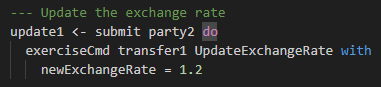

5. Let the exchange “Party 3” swap USD to GBP .

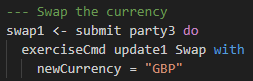

6. Try to let the holder do the swap. What will happen? Explain why this would happen.

"Script execution failed, displaying state before failing transaction"

Holder doesn't have the authority to use the swap function, swap is only available to exchange party

Ledger State
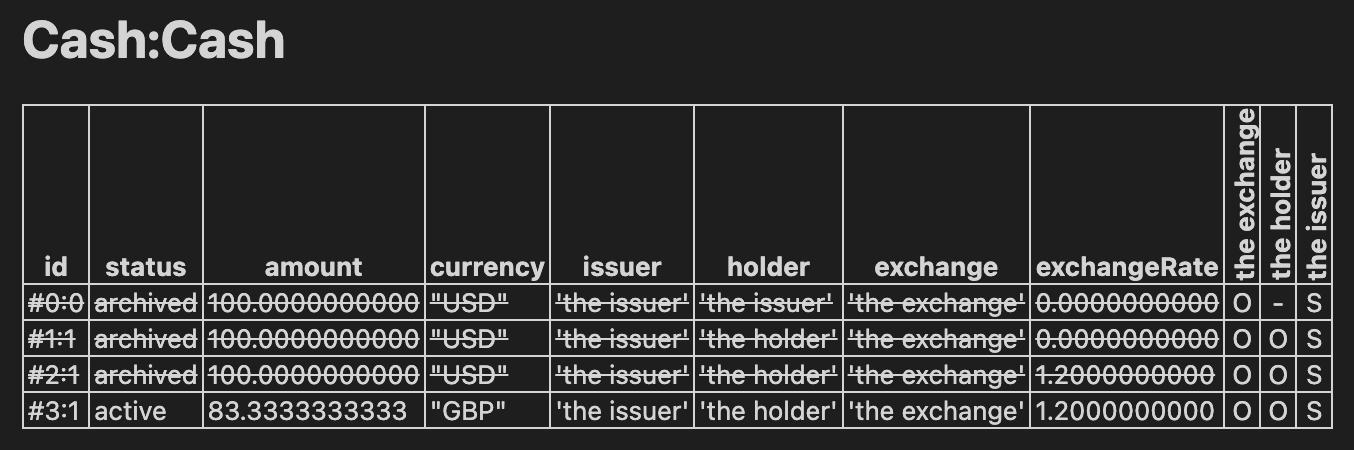

## Question 3 - ERC20 and AMM Deployment

1. Create two tokens with the ERC20 interface

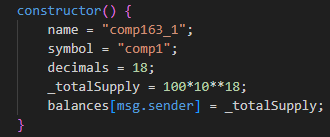

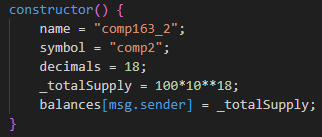

Please refer to files "comp163_1_ERC20.sol" and "comp163_2_ERC20.sol" under the folder "Q3 ERC20_AMM_Deloyment

2. Test the ERC20 contracts by deploying it on the Remix VM

comp1 transaction overview
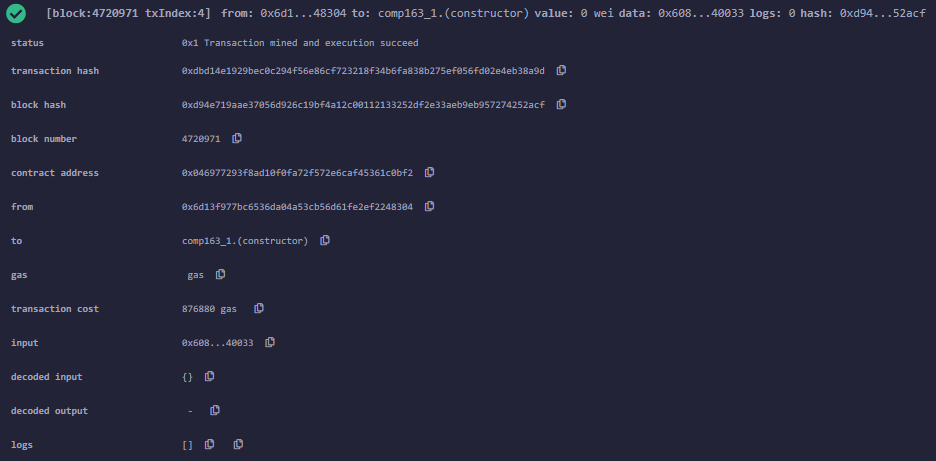

comp2 transaction overview
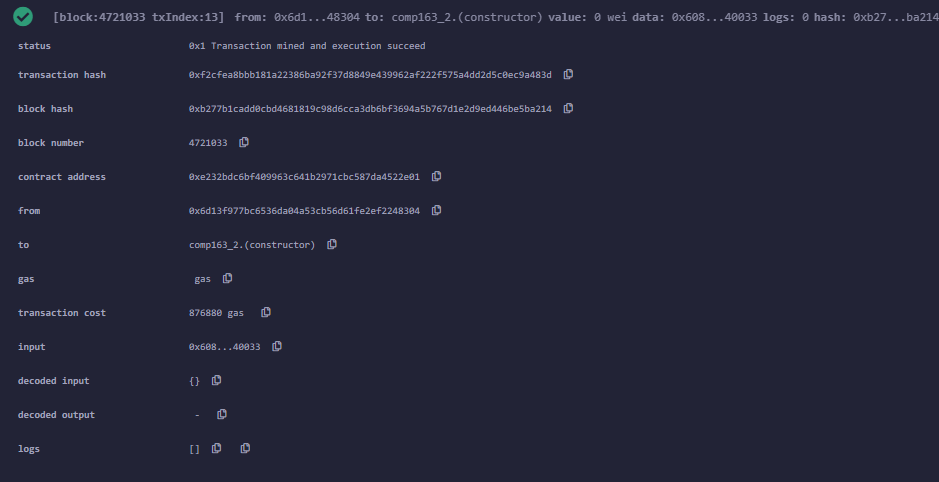

What’s the balance of comp1 and comp2 for your address?
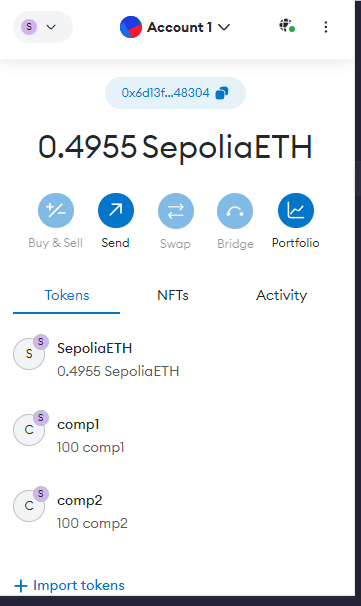
100 tokens each

3. Create a simple constant AMM contract by replacing “____” with the actual codes

Please refer to the file "AMM.sol"

4. Test the AMM contract by deploying it on the Remix VM. What’s the transaction hash of your creatation of the contract

AMM Transaction overview
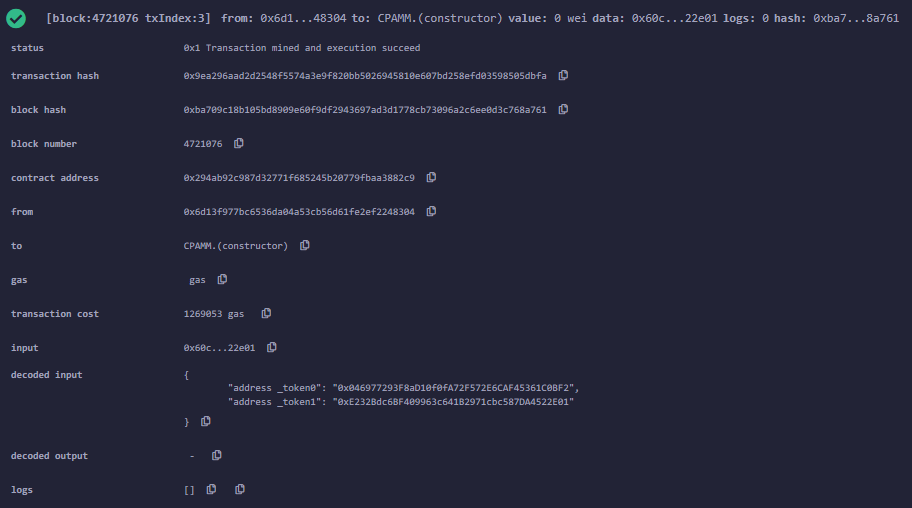
AMM contract Transaction Hash: 0x9ea296aad2d2548f5574a3e9f820bb5026945810e607bd258efd03598505dbfa

5. Approve 50 comp1 and 50 comp2 to the AMM contract, then add liquidity to the contract. Approve another 10 comp1 to the AMM contract, then swap comp1 for comp2 . Remove the liquidity.

Approve 50 comp1 to AMM transaction overview
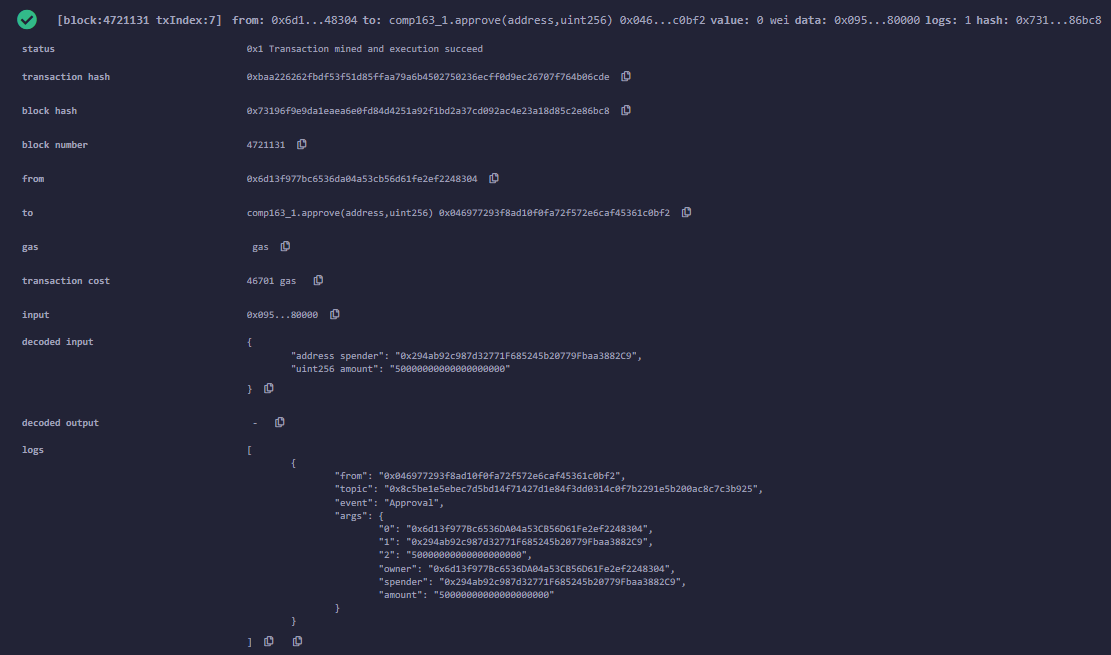

Approve 50 comp2 to AMM transaction overview
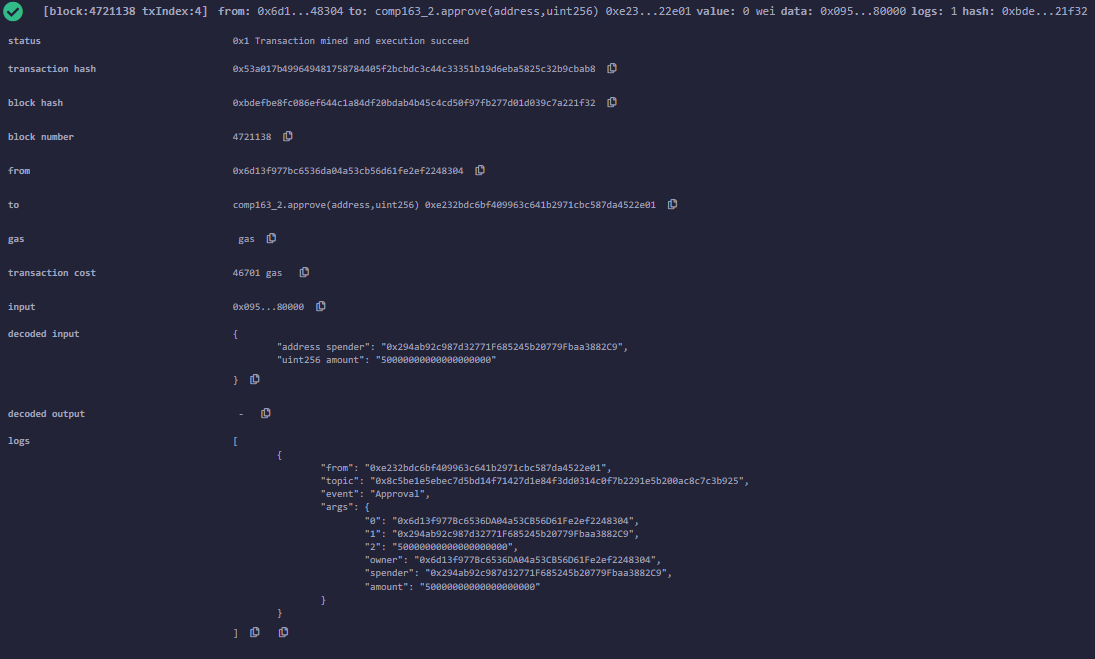

Add liquidity transaction overview
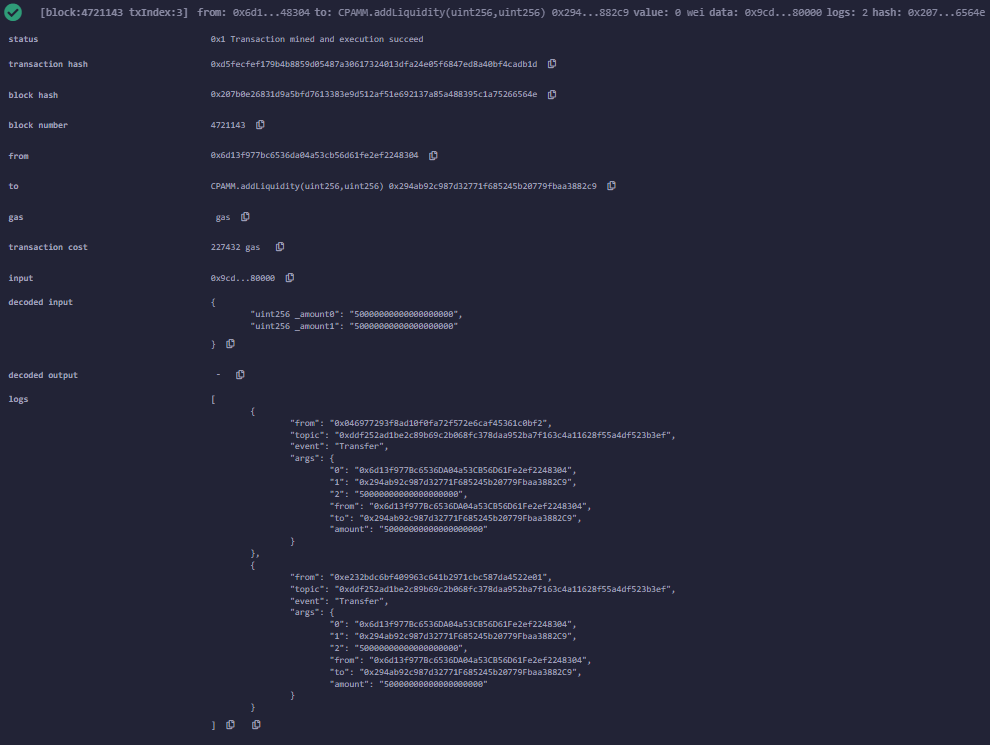

Approve another 10 comp1 to AMM transaction overview
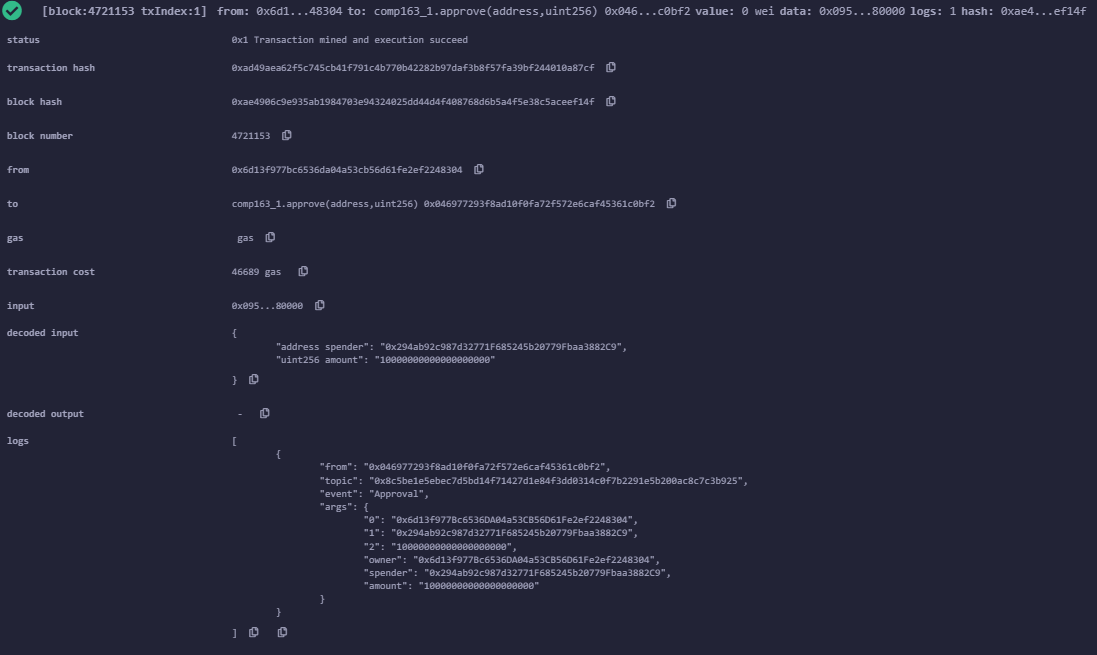

Swap comp1 for comp2 transaction overview
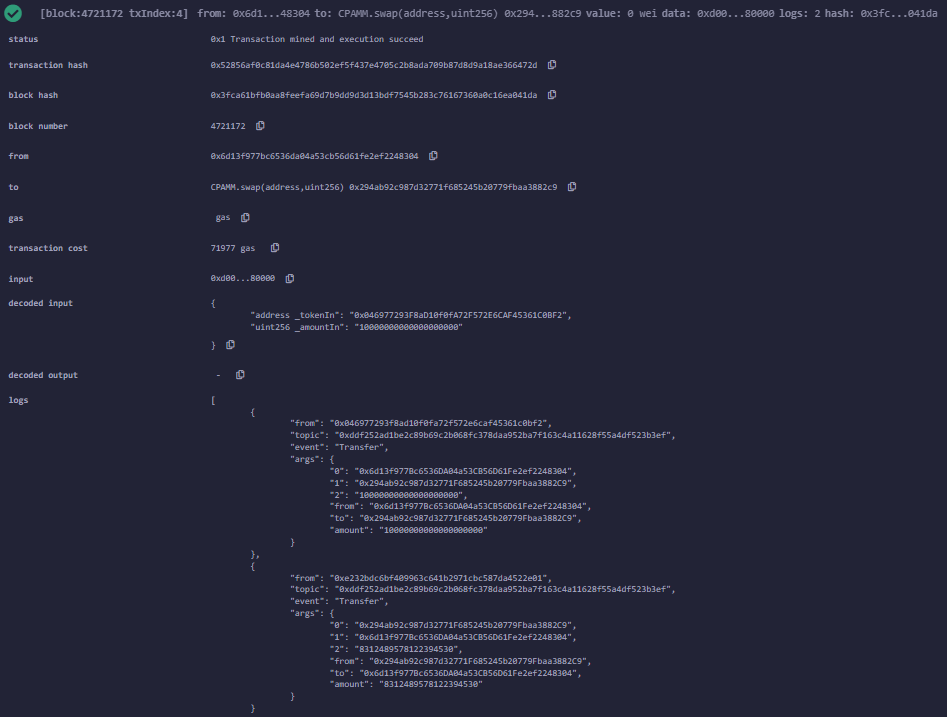

Remove liquidity transaction overview
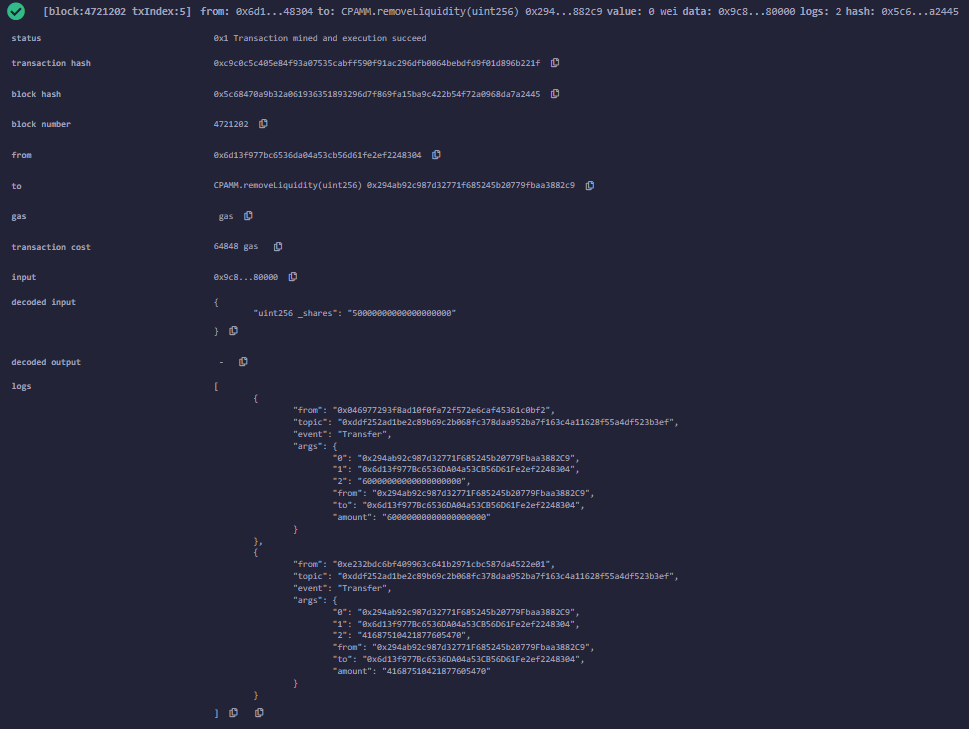

6. What other traditional financial agent could be replaced by the smart contract?

Credit Scoring Agencies (etc Experian) 
Traditional credit scoring agencies evaluate an individuals credit against a set criteria not known to the individual, only outputting a score that deems how creditworthy they are.
Smart contracts can use a user's transaction history on the blockchain to assess how creditworthy they are. Providing transparency and an objective assessment on creditworthiness,
it would also require a lot less information about the individual as traditional agencies will ask for full address history and a lot more data. 